# Project: Investigate a Dataset - Database TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project uses The Movie Database (TMDb) movie metadata from Kaggle. It covers several thousand films with plot summaries, full ordered cast and crew credits, budgets, revenues, popularity, votes, release dates, production companies, and more. After a DMCA takedown affected an older IMDb-based version, Kaggle replaced it with this TMDb dataset, which provides more up‑to‑date revenue figures and some JSON-formatted fields.

- Key notes:
  - Values are user-contributed, so inconsistencies may occur.
  - Some columns are JSON-formatted.
  - Zero values in budget/revenue may indicate missing data rather than true zeros.

For full background, transfer details, column changes, caveats, and loading tips, see: [TMDb movie metadata](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

### Questions for Analysis
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?
- Which movies are most efficient (profit to budget ratio)?
- Is there necessarily a relationship between high movie cost and high ratings?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [ ]:


df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [9]:
df.shape

(10866, 21)

In [27]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [32]:
# Calculate the number of duplicate values in each column.
# This shows how many values in each column are repeated.
df.shape[0] - df.nunique()

id                          1
imdb_id                    11
popularity                 52
budget                  10309
revenue                  6164
original_title            295
cast                      147
homepage                 7970
director                 5799
tagline                  2869
keywords                 2062
overview                   19
runtime                 10619
genres                   8827
production_companies     3421
release_date             4957
vote_count               9577
vote_average            10794
release_year            10810
budget_adj               8252
revenue_adj              6026
dtype: int64

In [25]:
# This shows how many missing (null) values 
# are in each column of the dataframe.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

 

In [90]:
# Remove duplicate movies based on 'id'
df_cleaning = df.copy()
df_cleaning = df_cleaning.drop_duplicates(subset='id', keep='first')
df_cleaning.shape


(10865, 21)

##### Since our analysis will focus on the 'genres' column, we need to make sure there are no missing values in this column.
We'll drop any rows where 'genres' is null so our results are accurate.

In [91]:
df_cleaning = df_cleaning.dropna(subset=['genres'])
df_cleaning.shape

(10842, 21)

##### In the next cell, we will keep only the adjusted budget and revenue columns.  
##### These columns (ending with "_adj") show the budget and revenue in 2010 dollars, which accounts for inflation.  
##### We will drop the original 'budget' and 'revenue' columns and rename the adjusted columns for easier analysis.



In [92]:
df_cleaning = (
    df_cleaning
    .drop(columns=['budget','revenue'])
    .rename(columns={'budget_adj':'budget','revenue_adj':'revenue'})
    )

#### Data Formatting
In the next two cells, we will clean up the data in some columns. 
We will split the text in the 'cast', 'keywords', 'production_companies', and 'genres' columns into lists. 
This will make it easier to analyze and work with these categories later.
After that, we will look at the first few rows of the cleaned data to make sure the changes worked.

In [93]:
categories_col = ['cast','keywords','production_companies', 'genres']
for category in categories_col:
    df_cleaning[category] = df_cleaning[category].str.split('|')


In [94]:
df_cleaning.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,tt0369610,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,"[future, chase, post-apocalyptic, dystopia, au...",An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,"[based on novel, revolution, dystopia, sequel,...",Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,"[android, spaceship, jedi, space opera, 3d]",Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Date Formatting
- In the next cells, we will convert the 'release_date' column from string format (MM/DD/YY) to datetime format.
- We'll split the dataset into two parts: movies released from 2000 onwards (df_20) and movies released before 2000 (df_19).
- For pre-2000 movies, we'll need to adjust the years since the two-digit year format can cause confusion (e.g., '99' could be interpreted as 2099 instead of 1999).
- This date conversion will allow us to perform time-based analysis and extract information like month, year, or day of week.


In [ ]:
# Convert year to integer and split data by century
df_cleaning['release_year'] = df_cleaning['release_year'].astype(int)

df_20 = df_cleaning.copy()  # For 2000+ movies
df_19 = df_cleaning.copy()  # For pre-2000 movies

df_20 = df_20[df_20['release_year'] >= 2000]
df_19 = df_19[df_19['release_year'] < 2000]

In [101]:
df_20['release_date'] = (
    pd.to_datetime(df_20['release_date'],format='%m/%d/%y')
)

In [105]:
df_20['release_date'].describe()

count                             7149
mean     2009-07-11 15:02:47.687788288
min                2000-01-01 00:00:00
25%                2006-04-05 00:00:00
50%                2010-01-14 00:00:00
75%                2013-05-13 00:00:00
max                2015-12-31 00:00:00
Name: release_date, dtype: object

In [122]:
# Convert release dates to datetime format
df_19['release_date'] = pd.to_datetime(df_19['release_date'], format='%m/%d/%y')

# Fix the century issue for dates appearing after 2000 (these should be 19xx not 20xx)
mask = df_19['release_date'] > pd.to_datetime('2000-01-01')
df_19.loc[mask, 'release_date'] = df_19.loc[mask, 'release_date'] - pd.DateOffset(years=100)

# Show statistics about the release dates
df_19['release_date'].describe()

count                             3693
mean     1986-12-14 20:32:33.533712448
min                1960-01-01 00:00:00
25%                1980-09-19 00:00:00
50%                1989-05-24 00:00:00
75%                1995-07-18 00:00:00
max                1999-12-31 00:00:00
Name: release_date, dtype: object

In [250]:
df_cleaned = pd.concat([df_19, df_20])


In [251]:
df_cleaned = df_cleaned[(df_cleaned['revenue'] > 0) & (df_cleaned['budget'] > 0)]
df_cleaned.shape

(3854, 19)

In [ ]:
### Which genres are most popular from year to year?

## EDA





Let's analyze the most common genre by year. This will help us understand how movie genre preferences have changed over time. We'll first need to explode the genres list to work with individual genres, then use mode() to find the most common genre for each year.





In [252]:
# Analysis of most popular genres by year
df_genres = df_cleaned.copy()
df_genres = df_genres.explode('genres')

# Group by release_year and find the most common genre for each year
genre_by_year = df_genres.groupby('release_year')['genres'].agg(lambda x: x.mode()[0])
genre_by_year = pd.DataFrame(genre_by_year)
display(genre_by_year)

,genres
release_year,
1960,Drama
1961,Drama
1962,Drama
1963,Drama
1964,Drama
1965,Drama
1966,Action
1967,Drama
1968,Drama


### What kinds of properties are associated with movies that have high revenues?
In this section, we'll analyze what factors correlate with high-revenue movies.
We'll identify movies in the top 10% by revenue and examine correlations between 
revenue and other numerical variables like budget, popularity, and vote metrics.
This will help us understand what characteristics are common among financially 
successful films.

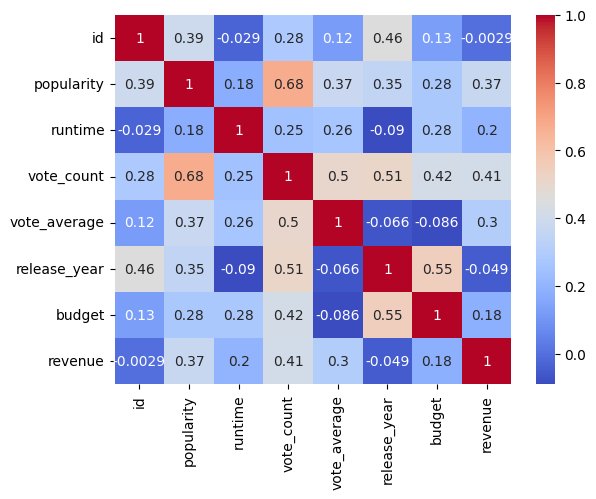

In [253]:
# Analyzing high-revenue movies (top 10%)
df_most_revenue = df_cleaned[df_cleaned['revenue'] >= df_cleaned['revenue'].quantile(0.9)]

# Get numerical columns for correlation analysis
numurca_col = []
for col in df_most_revenue.columns:
    if df_most_revenue[col].dtype == 'float64' or df_most_revenue[col].dtype == 'int64':
        numurca_col.append(col)

# Create correlation heatmap
sns.heatmap(df_most_revenue[numurca_col].corr(), annot=True, cmap='coolwarm');


### Which movies are most efficient (profit to budget ratio)?
This analysis identifies films that generated the highest return on investment by calculating
the ratio of revenue to budget, showing which movies were most financially efficient.

In [249]:
df_most_efficient = df_cleaned.copy()
df_most_efficient['profit_ratio'] = round(df_most_efficient['revenue'] / df_most_efficient['budget'], 2)
df_most_efficient = df_most_efficient[['original_title','profit_ratio']].sort_values(by='profit_ratio', ascending=False).head(10)
print(df_most_efficient)


                original_title  profit_ratio
10495  The Karate Kid, Part II    1018619.28
6179            Into the Night      58771.93
3608        From Prada to Nada      26881.72
7447       Paranormal Activity      12890.39
2449   The Blair Witch Project       9920.00
3581   Love, Wedding, Marriage       1378.00
1354                Eraserhead        700.00
7277            Pink Flamingos        500.00
7178             Super Size Me        439.62
242                The Gallows        426.64


#### Which movies generated the highest absolute profit?
This analysis identifies the top 10 movies with the highest absolute profit (revenue minus budget),
showing which films made the most money overall regardless of their budget size.

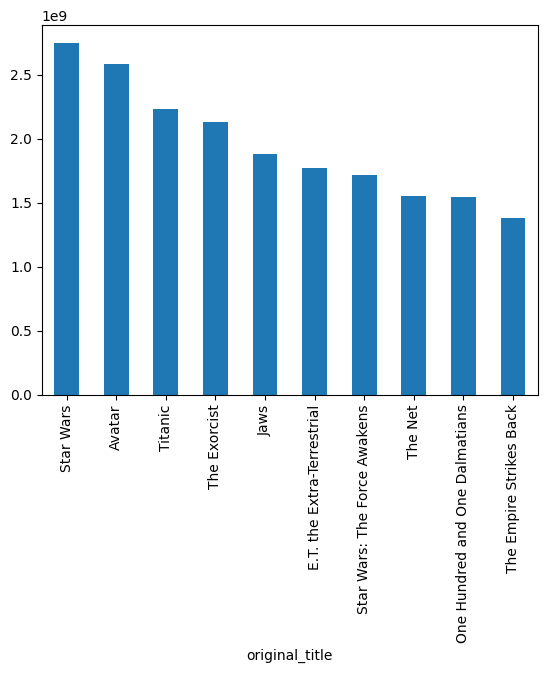

In [263]:
df_most_profitable = df_cleaned.copy()
df_most_profitable['profit_ratio'] = df_most_profitable['revenue'] - df_most_profitable['budget']
df_most_profitable =( 
    df_most_profitable[
        ['original_title','profit_ratio']
        ]
        .sort_values(by='profit_ratio', ascending=False)
        .head(10)
    )

(
    df_most_profitable
    .head(10)
    .plot(kind='bar', x='original_title', y='profit_ratio', legend=False)
);


### Is there necessarily a relationship between high movie cost and high ratings?

This analysis examines whether movies with higher budgets tend to receive higher ratings from viewers,
or if quality and cost are independent factors in the film industry.


<Figure size 1000x600 with 0 Axes>

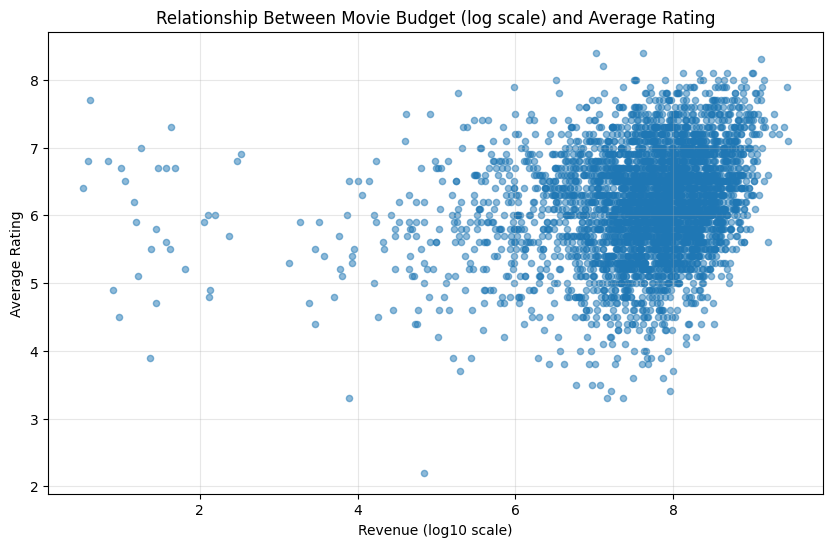

In [275]:
# Create a scatter plot to examine the relationship between movie budget and average vote rating

df_revenue_rating = df_cleaned.copy()
df_revenue_rating = df_revenue_rating[['revenue', 'vote_average']]

# Apply log transformation to budget to better visualize the relationship
df_revenue_rating['log_revenue'] = np.log10(df_revenue_rating['revenue'] + 1)  # Adding 1 to avoid log(0)

# Plot with clear labels and formatting
plt.figure(figsize=(10, 6))
df_revenue_rating.plot(
    kind='scatter', 
    x='log_revenue', 
    y='vote_average', 
    alpha=0.5,
    title='Relationship Between Movie Budget (log scale) and Average Rating',
    figsize=(10, 6)
)
plt.xlabel('Revenue (log10 scale)')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)


<a id='conclusions'></a>
## Conclusions

### Summary of Results
Based on the analysis of TMDb data (10,866 movies across multiple decades) and after cleaning and preparation steps, we answered key exploratory questions about genre popularity over time, characteristics of highest-grossing films, return-on-investment efficiency, absolute profits, and possible relationships between revenue/cost and ratings.

- **Genre Popularity Over Time**: Results show changing genre preferences year by year, with "Drama" frequently appearing among the most common genres, with annual fluctuations reflecting cultural and market changes.
- **Characteristics of Highest-Grossing Films**: The top 10% of films by revenue show correlations between revenue and adjusted budget, popularity, and vote count; suggesting certain factors cluster in commercially successful films (correlation without implying causation).
- **Financial Efficiency (Return/Budget)**: Low-budget films stood out among the most efficient in terms of return-to-budget ratio, such as "Paranormal Activity" and "The Blair Witch Project," confirming that small budgets can achieve relatively large returns.
- **Absolute Profits**: Commercially massive films top the list of highest absolute profits (revenue − budget), highlighting the impact of audience reach and market size regardless of budget size.
- **Relationship Between Revenue/Cost and Rating**: The charts don't show a strong pattern suggesting that higher revenues (or larger costs) necessarily mean higher ratings. Observations are descriptive and don't indicate a causal relationship.

### Limitations
- **Data Quality and Completeness**: Multiple columns contain missing values. We removed rows with missing values in critical columns like genres, which may introduce sample bias.
- **Inflation and Currencies**: We used inflation-adjusted values, but these may not always reflect actual purchasing power differences across decades.
- **Genre Classification**: A film belonging to multiple genres complicates analysis. Choosing the "most common" for each year simplifies the reality of genre mixing.
- **Value Filtering**: Analysis was limited to films with positive revenues and budgets, which may exclude important cases and affect distributions.
- **Absence of Statistical Tests**: No statistical significance tests were performed; therefore, results are descriptive and correlational without inferring causality.

### Proposed Future Work
- Conduct statistical tests and multivariate regression models to test the strength of correlations.
- Isolate the effect of budget from popularity and vote count to understand the relative contributions of each factor.
- Integrate external data (marketing spending, release season, distribution and platforms, public opinion indicators) to expand context.
- Conduct longitudinal studies to track performance of genres or series over time instead of cross-sectional snapshots.
- Address outliers and rescale (such as winsorization) to improve metric stability.